# Example Uses LPCA
Example Uses LPCA algorithm and compare with sklearn:
 
 * TSNE
 * KMeans
 * PCA

In [1]:
# Import Data
#   - Iris import
import pandas as pd
data_iris = pd.read_csv(filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                 header= None, 
                 sep= ',')

data_iris.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
data_iris.dropna(how="all", inplace=True) # drops the empty line at file-end
data_iris.info(verbose=True)

X_iris = data_iris.iloc[:,0:4].values
y_iris = data_iris.iloc[:,4].values
print("\nShape of X_iris: {} Shape of y_iris: {} \n".format(X_iris.shape, y_iris.shape))

#   - Bank data import from file 
data_bank =  pd.read_csv('data/bank.csv',
                    sep=';')
# Columns is build in file no need to add to data
data_bank.dropna(how="all", inplace=True) # drops the empty line at file-end
data_bank.info(verbose=True)

X_bank = data_bank.iloc[:,0:16].values
y_bank = data_bank.iloc[:,16].values
print("\nShape of X_bank: {} Shape of y_bank: {} \n".format(X_bank.shape, y_bank.shape))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  150 non-null    float64
 1   sepal_wid  150 non-null    float64
 2   petal_len  150 non-null    float64
 3   petal_wid  150 non-null    float64
 4   class      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB

Shape of X_iris: (150, 4) Shape of y_iris: (150,) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact  

In [2]:
# Preprocesin Data
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2, 3, 4, 6, 7, 8, 10, 15])], remainder='passthrough')
X_bank = np.float64(ct.fit_transform(X_bank))
print("\n After Preprocesing data shape is: ")
print("Shape of X_bank: {} Shape of Y_bank: {}".format(X_bank.shape, y_bank.shape))


 After Preprocesing data shape is: 
Shape of X_bank: (4521, 51) Shape of Y_bank: (4521,)


In [3]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pca.pca import LPCA # OWN Implementation
import seaborn
import time

_s = time.time()
X_tsne_iris = TSNE(n_components=2, n_jobs=-1).fit_transform(X_iris)
X_tsne_bank = TSNE(n_components=2, n_jobs=-1).fit_transform(X_bank)
X_KMns_iris = KMeans(n_clusters=2, random_state=0).fit_transform(X_iris)
X_KMns_bank = KMeans(n_clusters=2, random_state=0).fit_transform(X_bank)
X_pca_iris = PCA(n_components=2, random_state=0).fit_transform(X_iris)
X_pca_bank = PCA(n_components=2, random_state=0).fit_transform(X_bank)


entropy = 0.35
dt=0.05
X_s_iris, m_w_iris = LPCA(entropy, dt, gpu=False).l_pca(X_iris, C=False)
X_s_C_iris, m_w_C_iris, C_x_iris = LPCA(entropy, dt, gpu=False).l_pca(X_iris, C=True)

X_s_bank, m_w_bank = LPCA(entropy, dt, gpu=False).l_pca(X_bank, C=False)
X_s_C_bank, m_w_C_bank, C_x_bank = LPCA(entropy, dt, gpu=False).l_pca(X_bank, C=True)
_time = time.time() - _s

print("\n Finish in {}s".format(_time))


 Finish in 91.68692302703857s


In [4]:
a = [1, 2, 3, 4, 5]
print(C_x_bank.shape)

torch.Size([11, 11])


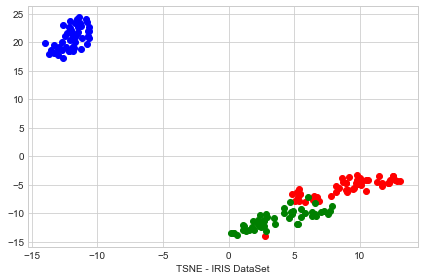

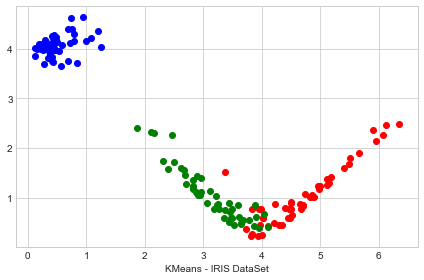

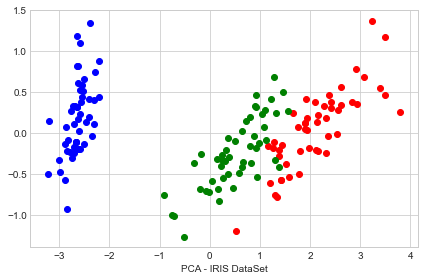

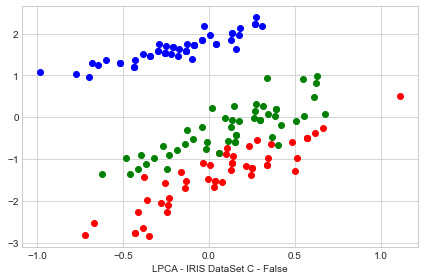

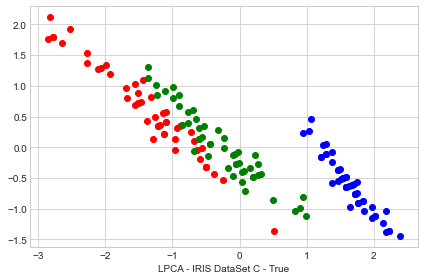


 For Bank Dataset 



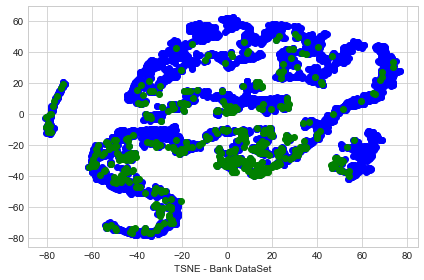

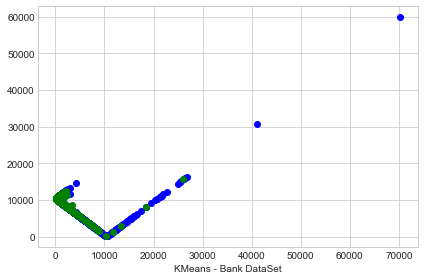

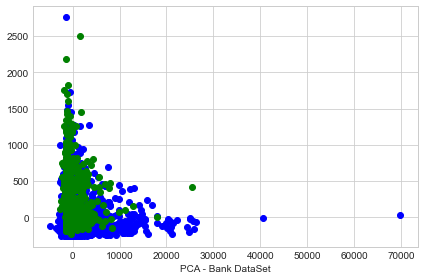

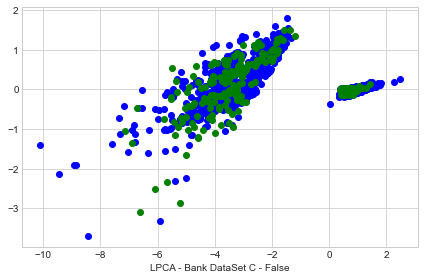

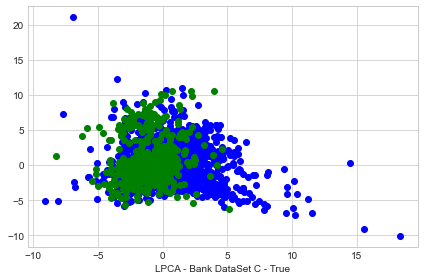

In [5]:
import matplotlib.pyplot as plt
import torch as t

def plot_print(X, y, name_plot,category, colors):
    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(6, 4))
        for lab, col in zip(category,colors):
            plt.scatter(X[y==lab, 0],
                        X[y==lab, 1],
                        label=lab,
                        c=col)
        plt.xlabel("{}".format(name_plot)) 
        #plt.legend(loc='lower center')
        plt.tight_layout()
        plt.show()

category = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
colors = ['blue', 'red', 'green']

name_plot = "TSNE - IRIS DataSet"
plot_print(X_tsne_iris, y_iris, name_plot, category, colors)
name_plot = "KMeans - IRIS DataSet"
plot_print(X_KMns_iris, y_iris, name_plot, category, colors)
name_plot = "PCA - IRIS DataSet"
plot_print(X_pca_iris, y_iris, name_plot, category, colors)
name_plot = "LPCA - IRIS DataSet C - False"
X_s_iris = t.mm(X_s_iris, m_w_iris)
plot_print(X_s_iris, y_iris, name_plot, category, colors)

# With C - Correlate all Matrix
name_plot = "LPCA - IRIS DataSet C - True"
X_s_C_iris_pre = t.mm(X_s_C_iris, m_w_C_iris)
X_s_C_iris_out = t.mm(X_s_C_iris_pre, C_x_iris)
plot_print(X_s_C_iris_out, y_iris, name_plot, category, colors)

print("\n For Bank Dataset \n")

category = ['no', 'yes']
colors = ['blue', 'green']
name_plot = "TSNE - Bank DataSet"
plot_print(X_tsne_bank, y_bank, name_plot, category, colors)
name_plot = "KMeans - Bank DataSet"
plot_print(X_KMns_bank, y_bank, name_plot, category, colors)
name_plot = "PCA - Bank DataSet"
plot_print(X_pca_bank, y_bank, name_plot, category, colors)
name_plot = "LPCA - Bank DataSet C - False"
X_s_bank = t.mm(X_s_bank, m_w_bank)
plot_print(X_s_bank, y_bank, name_plot, category, colors)

# With C - Correlate all Matrix
name_plot = "LPCA - Bank DataSet C - True"
X_s_C_bank_pre = t.mm(X_s_C_bank, m_w_C_bank)
X_s_C_bank_out = t.mm(X_s_C_bank_pre, C_x_bank)
plot_print(X_s_C_bank_out, y_bank, name_plot, category, colors)


#Y = t.mm(t.mm(X_s, t.tensor(m_w[-1])), t.tensor(C.T)) IF C is True